In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [27]:
dataset=pd.read_csv("../raw_data/dataset.csv")

In [28]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [30]:
dataset[dataset.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [32]:
dataset.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)

<Axes: xlabel='Exited', ylabel='count'>

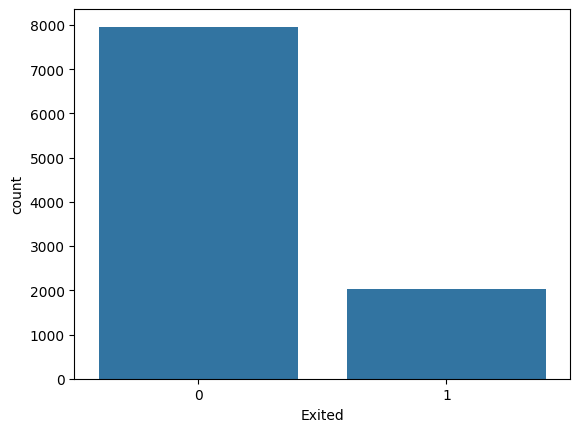

In [33]:
sns.countplot(x="Exited",data=dataset)

In [34]:
num_cols=dataset.select_dtypes(np.number).columns
num_cols

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>]], dtype=object)

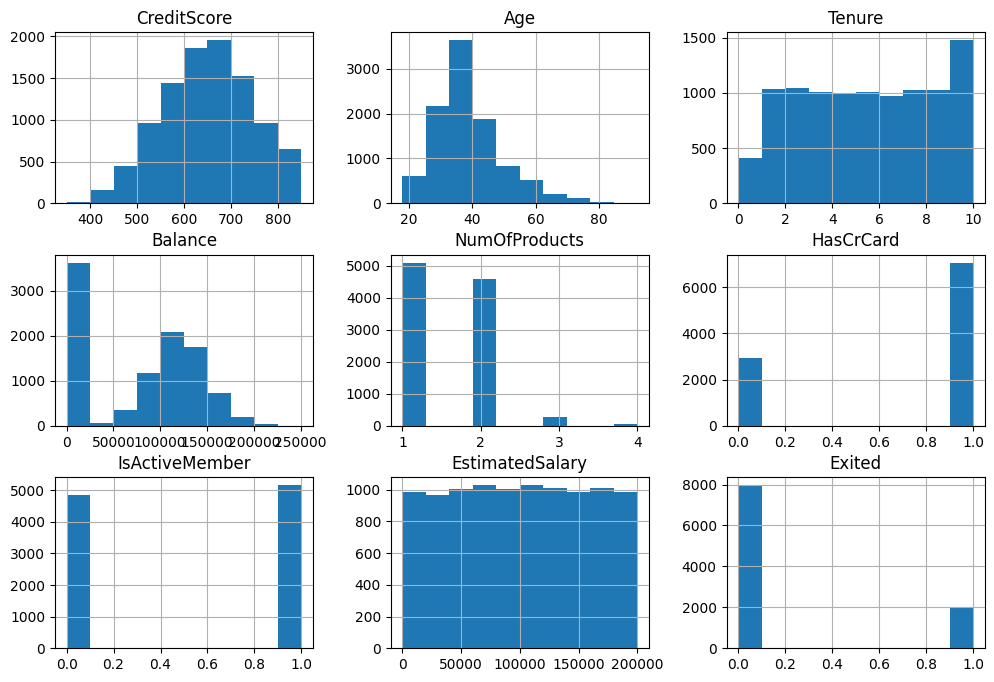

In [35]:
dataset[num_cols].hist(figsize=(12,8))

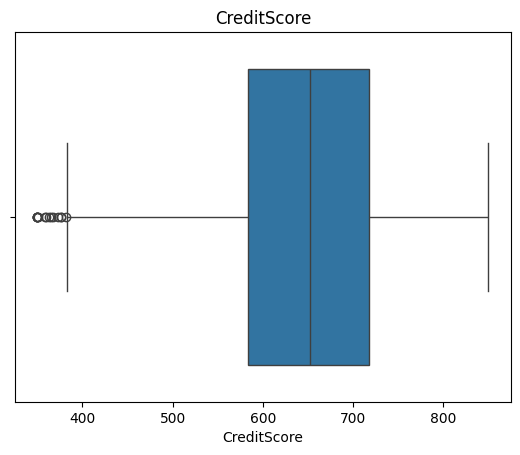

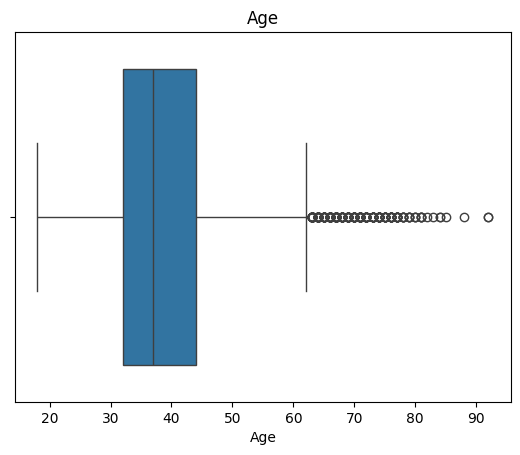

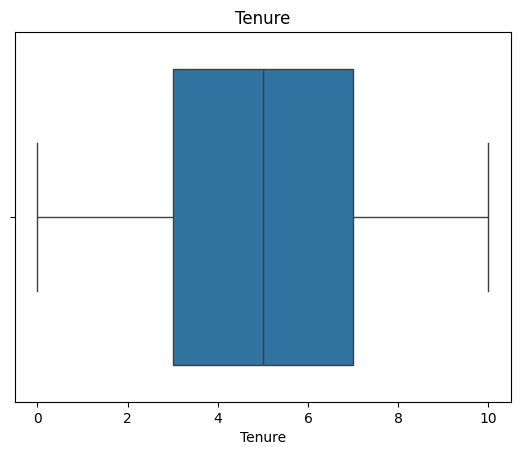

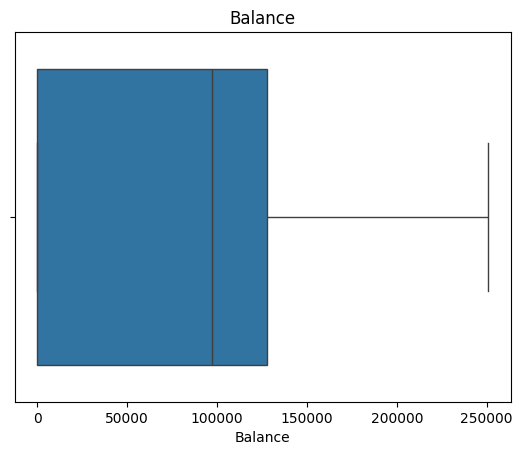

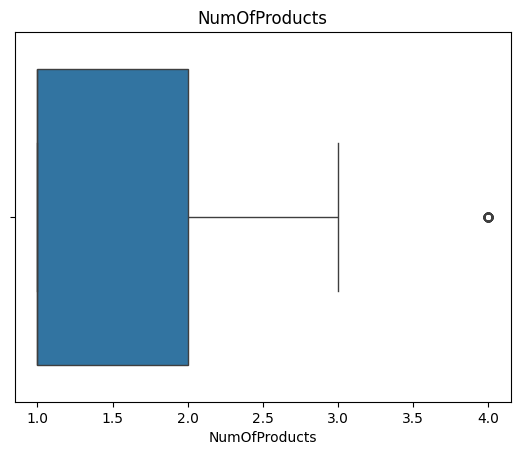

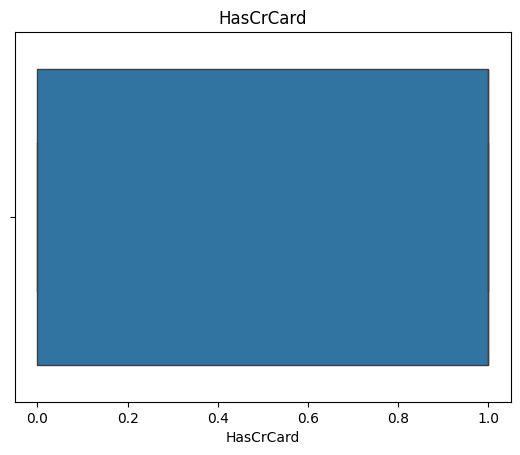

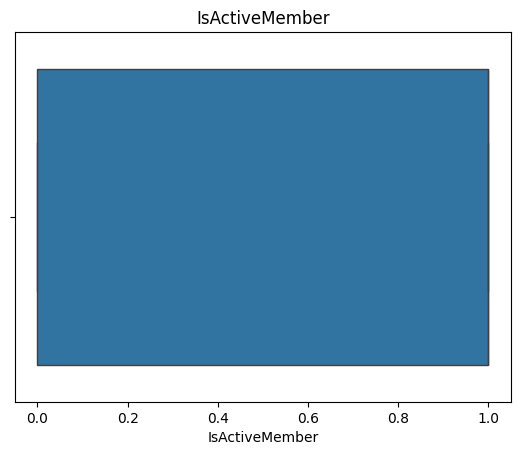

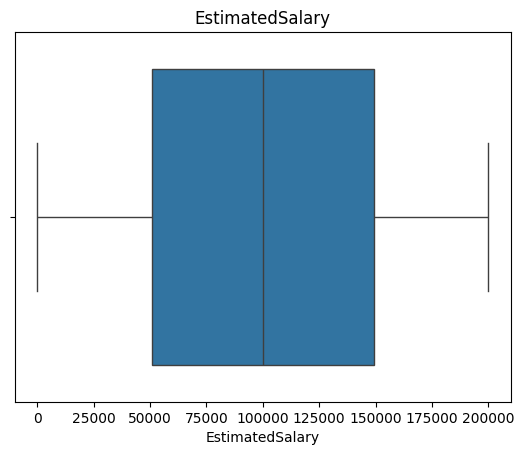

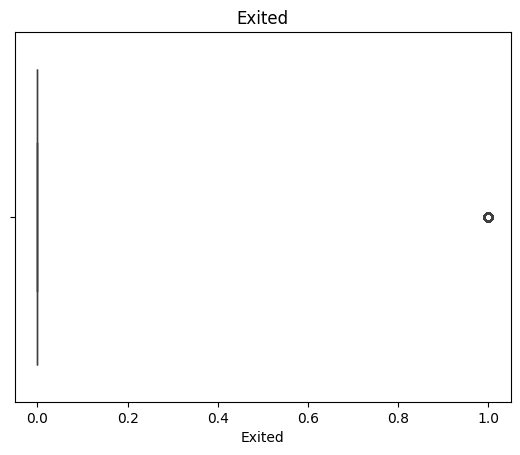

In [36]:
for col in num_cols:
    sns.boxplot(x=dataset[col])
    plt.title(col)
    plt.show()

In [37]:
cat=dataset.select_dtypes(pd.Categorical).columns
cat

Index(['Geography', 'Gender'], dtype='object')

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64


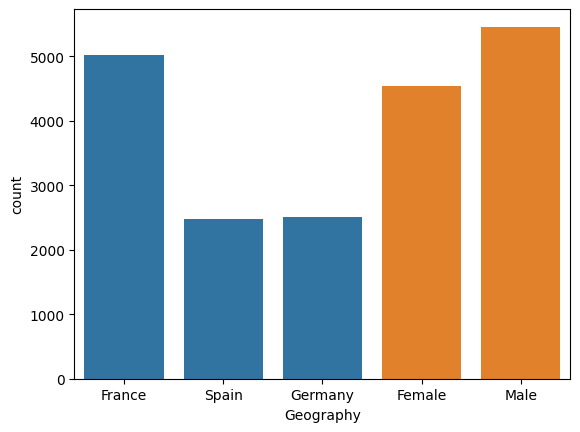

In [38]:
for col in cat:
    print(dataset[col].value_counts())
    sns.countplot(x=col, data=dataset)

In [39]:
for i in dataset:
  print(f"{i}=={dataset[i].unique()}")

CreditScore==[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [40]:
dataset["Gender"]=dataset["Gender"].map({"Male":1,"Female":0})

In [41]:
df=pd.get_dummies(data=dataset,columns=["Geography"],dtype=int,drop_first=True)

In [42]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,1,0


In [43]:
features=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary','Gender',
       'HasCrCard', 'IsActiveMember','Geography_Germany', 'Geography_Spain']
x=df[features]
y=df['Exited']


In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [45]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Gender,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain
5669,648,33,7,135310.41,2,171668.20,1,0,1,1,0
8800,691,37,9,149405.18,1,146411.60,1,1,1,0,0
3205,850,42,8,0.00,1,19632.64,0,1,0,0,0
8731,727,41,10,0.00,2,47468.56,0,0,1,0,1
6412,602,53,5,98268.84,1,45038.29,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
794,654,29,1,0.00,1,180345.44,1,1,0,0,0
142,682,43,5,125851.93,1,193318.33,0,1,1,0,0
275,706,37,7,0.00,2,110899.30,0,1,1,0,1
8265,618,40,0,140306.38,1,160618.61,0,1,0,1,0


In [46]:
from sklearn.preprocessing import StandardScaler
scaled_features=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']
scaler=StandardScaler()
x_train[scaled_features]=scaler.fit_transform(x_train[scaled_features])
x_test[scaled_features]=scaler.transform(x_test[scaled_features])

In [47]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Gender,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain
5951,0.726827,0.198761,0.681383,-1.228576,0.809391,-0.676707,1,0,1,0,0
6630,0.932858,-0.277114,-0.704157,-1.228576,0.809391,-0.176273,0,1,1,0,0
3240,-0.725691,1.055336,-1.743312,0.785984,-0.913634,-0.737167,1,1,0,0,0
5942,-1.374689,1.340861,-1.743312,0.521842,-0.913634,-0.786973,1,1,0,1,0
3789,-0.426946,0.579461,-0.357772,0.200362,-0.913634,1.726512,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3714,1.777585,-0.467464,-0.704157,0.455855,-0.913634,-1.577247,1,1,0,0,0
7409,1.612760,0.293936,1.374153,0.460645,0.809391,0.531013,0,1,1,1,0
3325,-1.271673,-0.657814,0.681383,-1.228576,0.809391,-0.970839,0,1,1,0,0
9606,-1.302578,0.484286,1.720538,0.672494,0.809391,-0.309920,1,0,0,0,0


In [48]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier(n_estimators=300,random_state=12)

In [49]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_res, y_res = sm.fit_resample(x_train, y_train)


In [50]:
random.fit(x_res,y_res)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [51]:
y_pred=random.predict(x_test)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix,recall_score,f1_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print("recall_score:",recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

[[1412  152]
 [ 169  267]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1564
           1       0.64      0.61      0.62       436

    accuracy                           0.84      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.84      0.84      0.84      2000

recall_score: 0.6123853211009175
f1_score: 0.624561403508772


In [53]:
importances=random.feature_importances_
indices=np.argsort(importances)[::-1]
feature_name=[features[i] for i in indices]

<Axes: >

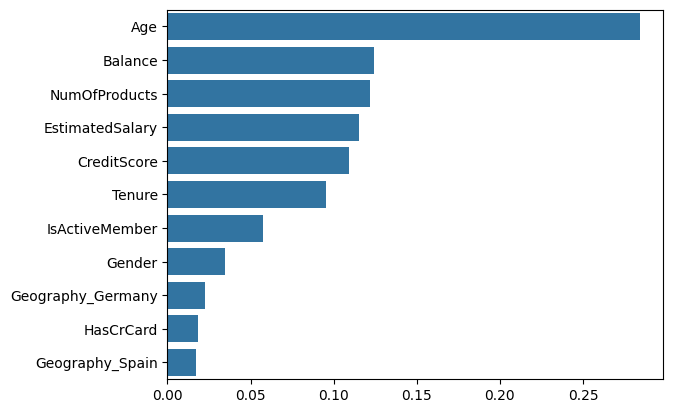

In [54]:
sns.barplot(y=feature_name,x=importances[indices])

In [55]:
import joblib
joblib.dump(random,'../ml_model/model.pkl')
joblib.dump(scaler,'../ml_model/scaler.pkl')

['../ml_model/scaler.pkl']